# ANALISI DATI ESERCIZI 8.1/2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In questo esercizio ho calcolato l'energia di una particella in una buca di potenziale di equazione $V(x) = x^4 - \frac{5}{2}x^2$. 

Per fare ciò ho dovuto calcolare il seguente integrale  $$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

dove $|\Psi_T(x)|$ rappresenta la funzione d'onda della particella. Mi concentro sulle distribuzioni di equazione: $$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Quindi per campionare $|\Psi_T(x)|^2$ ho utilizzato l'algoritmo di Metropolis con un passo di $2$ per avere un accettanza pari circa al 50%. 

Prima di fare ciò però ho cercato però i parametri $\sigma$ e $\mu$ che minimizzassero l'energia del sistema. I parametri li ho trovati utilizzando una doppia "Grid Search" e sono arrivato ai seguenti parametri $\sigma=0.62$ e $\mu=0.85$.

Ottenuti i parametri ottimali ho cominciato le simulazioni, ho eseguito $M=10^5$ simulazioni ed una media a blocchi con $N=100$ blocchi.

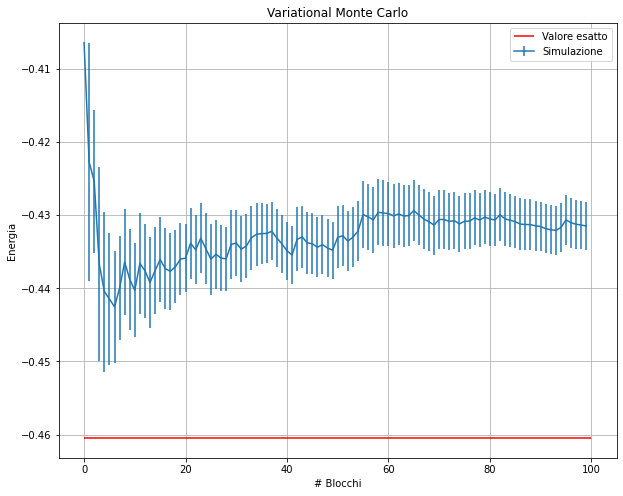

In [10]:
energy=np.loadtxt("Esercizio8_1/energy.txt")
plt.figure(figsize=(10,8))

#I have plotted a function of number of throws, not blocks
n=np.arange(100)
plt.errorbar(n,energy[:,0],yerr=energy[:,1],label="Simulazione")
plt.hlines(-0.460465879692715,0,100,color="red",label="Valore esatto")
plt.grid(True)
plt.xlabel("# Blocchi")
plt.ylabel("Energia" )
plt.legend()
plt.title("Variational Monte Carlo")
plt.show()

In grafico i risultati delle mie simulazioni Monte Carlo per il calcolo dell'energia della particella. Confrontando il valore trovato con l'energia dello stato fondamentale calcolata in maniera esatta noto che la distribuzione ottimale, che ho trovato, sovrastima il valore dell'energia.

In [14]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
psi_teo=psi

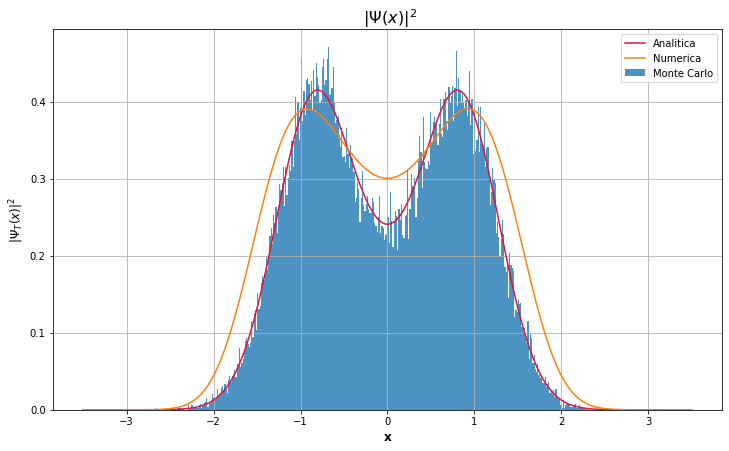

In [18]:
plt.figure(figsize = (12,7))
plt.grid(True)
psi= np.loadtxt("Esercizio8_1/psi.txt")

points=1000
x = np.linspace(-3.5,3.5,num=points)
mu = 0.85
sigma = 0.62

e = (np.exp(-(x+mu)**2/(2*sigma**2))+np.exp(-(x-mu)**2/(2*sigma**2)))**2
norm = 2*sigma*np.sqrt(np.pi)*(1.+np.exp(-mu**2/(sigma**2))) 
psi2 = e/norm

plt.hist(psi,bins = 500, density = True, range = [-3.5,3.5], label = "Monte Carlo", alpha = 0.8)
plt.plot(x, psi2, label = "Analitica", color = 'crimson')
plt.plot(x,psi_teo[0]**2,label="Numerica")
plt.xlabel('x', fontsize = 12, fontweight = 'bold')
plt.ylabel('$|\Psi_T(x)|^2$', fontsize = 12, fontweight = 'bold')
plt.title(' $|\Psi(x)|^2$', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()


In questo grafico l'istogramma della funzione d'onda della particella campionata dalle simulazioni, il grafico di quella analitica e di quella numerica. Il distribuzione dei punti segue la distribuzione analitca, ma non coincide con la soluzione esatta.

## Esercizio 8.3

In questa seconda parte invece ho ripetuto lo stesso calcolo della prima parte utilizzando però il codice PIGS. Ho testato il codice sia con una funziona d'onda costante $|\Psi(x)|=1$ sia con la stessa dell'esercizio precedente,$\Psi_T^{\sigma,\mu}(x)$ . Ho modificato il codice fornito aggiungendo il potenziale della buca e le sue derivate, inserendo la funzione d'onda con i parametri ottimizzati trovati prima e le sue derivate. Dopo di che ho provato anche a far variare anche la parte temporale immaginaria.

In [20]:
psi_gs=np.loadtxt("QMC_1D/GS_psi/probability.dat")
constant_gs=np.loadtxt("QMC_1D/constant_psi/probability.dat")

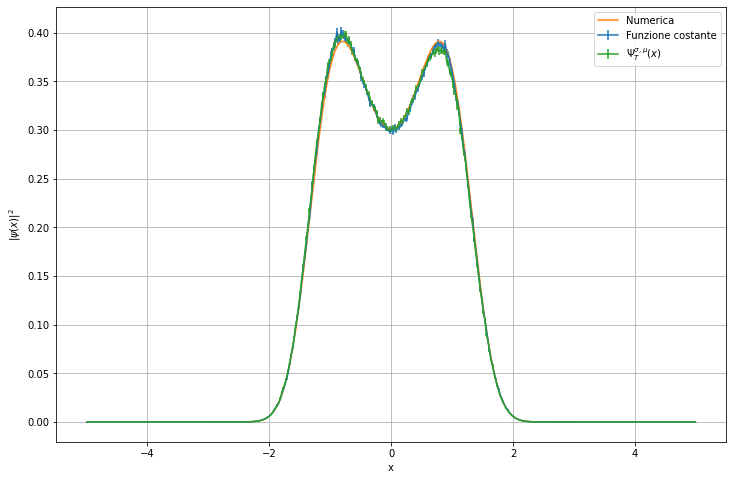

In [21]:
plt.figure(figsize=(12,8));
plt.errorbar(constant_gs[:,0],constant_gs[:,1], yerr=constant_gs[:,2], label='Funzione costante');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Numerica")
plt.errorbar(psi_gs[:,0], psi_gs[:,1], yerr=psi_gs[:,2], label="$\Psi_T^{\sigma,\mu}(x)$");
plt.legend();

In grafico i risultati del codice PIGS sia con la funzione d'onda costante che con la funzione d'onda $\Psi_T^{\sigma,\mu}(x)$, usata nell'esercizio precedente. Si nota come anche per la funzione d'onda costante la forma della distribuzione rimane la medesima.

## Riduzione parte immaginaria

In [22]:
TR_psi=np.loadtxt("QMC_1D/TR_psi/probability.dat")

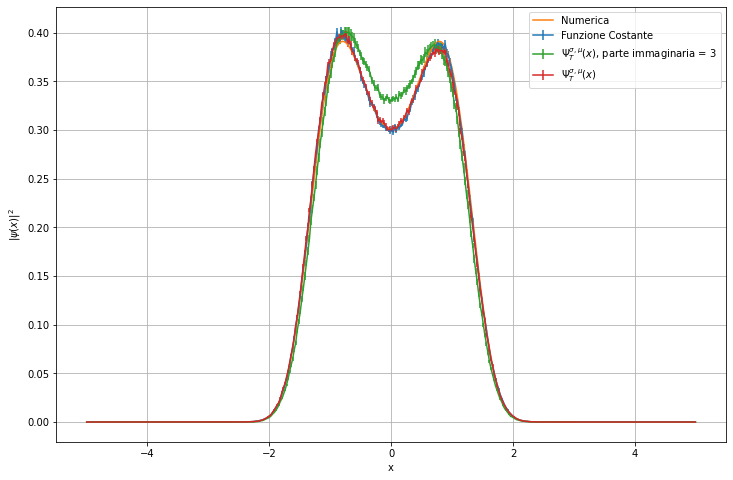

In [23]:
plt.figure(figsize=(12,8));
plt.errorbar(constant_gs[:,0],constant_gs[:,1], yerr=constant_gs[:,2], label='Funzione Costante');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Numerica")
plt.errorbar(TR_psi[:,0], TR_psi[:,1], yerr=TR_psi[:,2], label="$\Psi_T^{\sigma,\mu}(x)$, parte immaginaria = 3");
plt.errorbar(psi_gs[:,0], psi_gs[:,1], yerr=psi_gs[:,2], label="$\Psi_T^{\sigma,\mu}(x)$");
plt.legend();

In questo grafico mostro i risultati ottenuti cambiando la parte immaginaria per la funzione d'onda $\Psi_T^{\sigma,\mu}(x)$. Fino ad un valore 4 della parte immaginaria la forma della distribuzione rimane simile a quella numerica, per valori minori ciò non è più vero.

### PIMC T>0

In quest'ultima parte utilizzo sempre lo stesso codice ma faccio variare la temperatura del sistema, utilizzando le temperature di $1.25K$, $10K$, $20K$ e $30K$.

In [27]:
psi_pimc=np.loadtxt("QMC_1D/Pimc_psi/probability.dat")
psi_pimc10=np.loadtxt("QMC_1D/Pimc_psi/probability_10.dat")
psi_pimc20=np.loadtxt("QMC_1D/Pimc_psi/probability_20.dat")
psi_pimc30=np.loadtxt("QMC_1D/Pimc_psi/probability_30.dat")

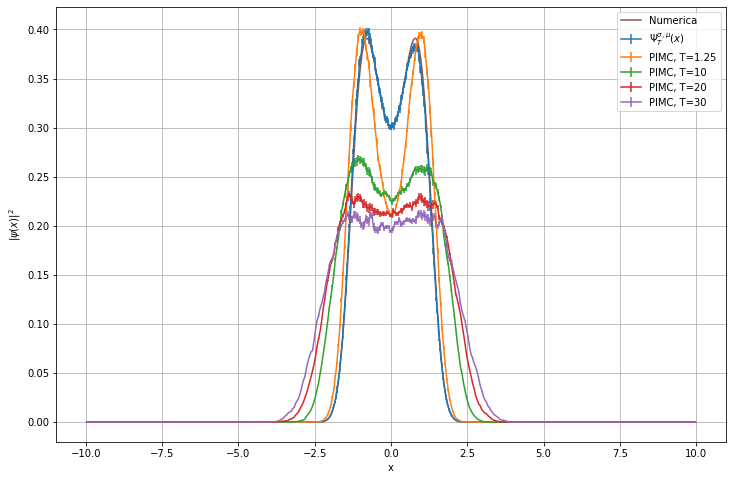

In [28]:
plt.figure(figsize=(12,8));
plt.errorbar(psi_gs[:,0], psi_gs[:,1], yerr=psi_gs[:,2], label="$\Psi_T^{\sigma,\mu}(x)$");
plt.errorbar(psi_pimc[:,0], psi_pimc[:,1], yerr=psi_pimc[:,2], label='PIMC, T=1.25');
plt.errorbar(psi_pimc10[:,0], psi_pimc10[:,1], yerr=psi_pimc[:,2], label='PIMC, T=10');
plt.errorbar(psi_pimc20[:,0], psi_pimc20[:,1], yerr=psi_pimc[:,2], label='PIMC, T=20');
plt.errorbar(psi_pimc30[:,0], psi_pimc30[:,1], yerr=psi_pimc[:,2], label='PIMC, T=30');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Numerica")
plt.legend();

Il confronto tra la funzione d'onda campionata con PIMC, quella teorica e quella con PIGS mostra come ci sia un cambiamento della funzione di Schroedinger a temperature diverse da 0. La funzione d'onda si allarga e si impiattisce.